Best degree 4 with RMSE 1.0710402581765826e-08


Text(0, 0.5, 'RMSE')

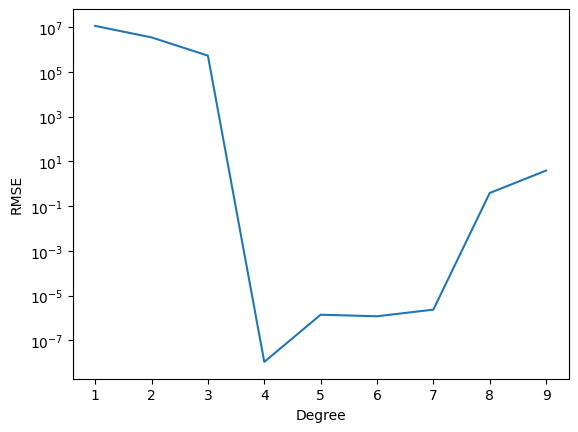

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#numpy.arange([start, ]stop, [step, ]dtype=None, *, like=None)
X = np.arange(100).reshape(100, 1) # 100 row and 1 column (vector)
y = X**4 + X**3 + X + 1

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0

for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(x_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(x_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg

# Plot and present results
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))
        
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

def make_poly_features(x,degree):
    X = np.zeros(shape = (x.size, degree+1))
    X[:,0] = 1
    for i in range(degree):
        X[:,i+1] = np.power(x,i+1)

    betas = np.random.normal(0, 2, size = X.shape[1])
    y = X@betas + np.random.normal(0, 4, size = x.size)
    return y, betas


degree = np.random.randint(low = 2, high = 6)
x = np.random.normal(size = 100)
y, coef = make_poly_features(x,degree)

plt.scatter(x,y)

model = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())

parms = {'polynomialfeatures__degree': np.arange(2, 6)}

gscv = GridSearchCV(model, parms, cv = 10, scoring='neg_mean_squared_error')
gscv.fit(x.reshape(-1,1),y)

space = np.linspace(-3,3,101).reshape(-1,1)

est_deg= gscv.best_params_['polynomialfeatures__degree']

plt.plot(space, gscv.predict(space), color = 'red')
plt.title(f'True Degree: {degree}  Estimated Degree:{est_deg}')
